# Color Threshold, Blue Screen show
Import resources

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

/home/sl/bin/anaconda3/envs/cv/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Read in an image on blue screen.

In [3]:
image = cv2.imread('girl-bluescreen.jpg')
#print info
print(f'image type {type(image)} shape {image.shape}')

image type <class 'numpy.ndarray'> shape (480, 852, 3)


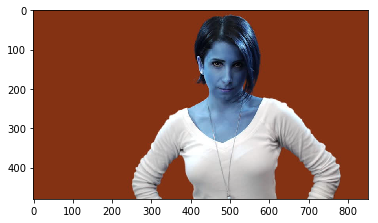

In [4]:
# sets the backend of matplotlib to the 'inline' backend:
# the output of plotting commands is displayed inline within cell.
%matplotlib inline
# display, cv image is in BGR
plt.imshow(image)

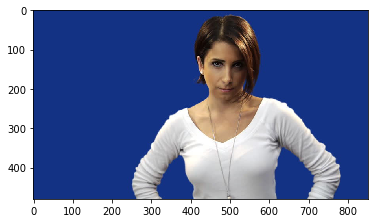

In [8]:
# change to RGB expected by IPython notebook
rgbImg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgbImg)

## Color Threshold

In [12]:
# pick a value of blue-screen
print(f'dot at blue screen {rgbImg[0,0,:]}')

dot at blue screen [ 19  50 132]


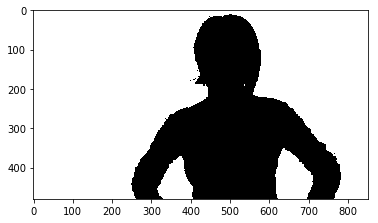

In [19]:
# Define the color treshold in RGB value.
lowerBlue = np.array([0,0,120])
upperBlue = np.array([30, 60, 255])
# mask - select area by color threshold
mask = cv2.inRange(rgbImg, lowerBlue, upperBlue)
# visualise mask
plt.imshow(mask, cmap='gray')

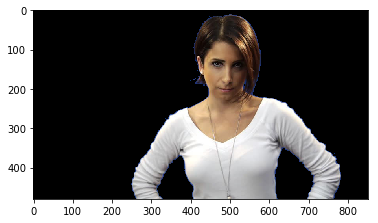

In [21]:
maskedFront = np.copy(rgbImg)
# select part of image that white in mask and set them to black
maskedFront[mask != 0] = [0,0,0]
# only not masked area is shown thougth
plt.imshow(maskedFront)

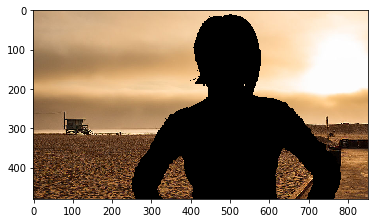

In [23]:
# construct background image
backgroundBRG = cv2.imread('LA_beach.jpg')
backgroundRGB = cv2.cvtColor(backgroundBRG, cv2.COLOR_BGR2RGB)
# crop to the right size (481, 853)
background = backgroundRGB[0:480, 0:852]
# background image to show where mask is detected
maskedBack = np.copy(background)
maskedBack[mask == 0] = [0,0,0]
# check up
plt.imshow(maskedBack)

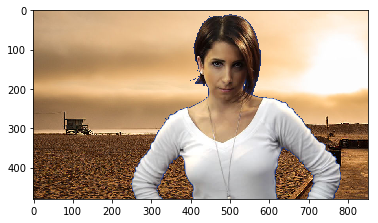

In [24]:
# apply back and front with mask
scene = maskedFront + maskedBack
plt.imshow(scene)